In [1]:
# Mount the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Install the Kaggle package
!pip install -q kaggle==1.5.12

# Create a kaggle folder
!mkdir ~/.kaggle
# Copy the json file into the Kaggle folder
!cp "/content/gdrive/MyDrive/recording/spaceship-titanic/kaggle.json" ~/.kaggle
# Give full access to read & write
!chmod 600 ~/.kaggle/kaggle.json

# Download the spaceship titanic dataset
!kaggle competitions download -c spaceship-titanic
# Unzip the downloaded zip file
!unzip spaceship-titanic.zip
# Delete the zip file
!rm -rf spaceship-titanic.zip

# Flush the memory and unmount the Drive folder
drive.flush_and_unmount()

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 81.9MB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
# Import the modules
# !pip install -q pandas==1.3.5
import pandas as pd

# Read the train & test data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Trace the train data
train.sample(n=10, random_state=42)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
304,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,Weros Perle,True
2697,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,Gleney Ortinericey,False
8424,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Gerry Englence,False
1672,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,NaN,0.0,Antone Cardner,True
8458,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Errairk Crakete,True
3438,3706_02,Mars,False,F/770/P,TRAPPIST-1e,18.0,False,131.0,0.0,980.0,1.0,0.0,Honda Kidie,True
3362,3614_01,Earth,False,F/749/P,TRAPPIST-1e,20.0,False,2.0,0.0,7.0,2.0,547.0,Eduard Quinnerry,False
3235,3476_04,Earth,False,G/571/P,TRAPPIST-1e,24.0,False,1.0,467.0,4.0,0.0,341.0,Bonne Burksson,False
1139,1210_01,Earth,True,G/179/P,TRAPPIST-1e,45.0,NaN,0.0,0.0,0.0,0.0,0.0,Helean Brooker,True
1210,1289_01,Earth,False,G/195/S,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,NaN,Idace Fultz,False


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
# Check the memory usage of the train data
print(f"{round(train.memory_usage(deep=True).sum() * 1e-6, 3)} MB.")

3.832 MB.


In [6]:
# Check the shape of the data
print(f"Train: {train.shape}, Test: {test.shape}. Portion: {round(len(test) / len(train), 2)}.")

Train: (8693, 14), Test: (4277, 13). Portion: 0.49.


In [7]:
def calc_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Returns the missing percentages of the given frame.

    Args:
        df (pd.DataFrame): Dataset.

    Returns:
        pd.DataFrame: The missing percentages frame.

    """
    # Sum the number of missing values
    missing = df.isnull().sum()
    # Calculate the missing percentages
    percent_missing = missing * 100 / len(df)
    # Create a frame
    missing_value_df = pd.DataFrame(data={
        "num_missing": missing,
        "percent_missing": percent_missing
    })
    # Round the percentage values
    missing_value_df = round(missing_value_df, 2)
    # Sort from highest to lowest
    missing_value_df = missing_value_df.sort_values("percent_missing",
                                                    ascending=False)
    # Return the results
    return missing_value_df


# Check the missing value portions of the training data
train_missing = calc_missing(df=train); train_missing

,num_missing,percent_missing
CryoSleep,217,2.50
ShoppingMall,208,2.39
VIP,203,2.34
HomePlanet,201,2.31
Name,200,2.30
Cabin,199,2.29
VRDeck,188,2.16
FoodCourt,183,2.11
Spa,183,2.11
Destination,182,2.09


In [8]:
# Same for the test data
test_missing = calc_missing(df=test); test_missing

,num_missing,percent_missing
FoodCourt,106,2.48
Spa,101,2.36
Cabin,100,2.34
ShoppingMall,98,2.29
Name,94,2.20
CryoSleep,93,2.17
VIP,93,2.17
Destination,92,2.15
Age,91,2.13
HomePlanet,87,2.03


In [9]:
# Extract the names of the missing features of the train data
train_missing = train_missing[(train_missing != 0).all(1)].index.sort_values()
train_missing

Index(['Age', 'Cabin', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'Name', 'RoomService', 'ShoppingMall', 'Spa', 'VIP', 'VRDeck'],
      dtype='object')

In [10]:
# Same for the test data
test_missing = test_missing[(test_missing != 0).all(1)].index.sort_values()
test_missing

Index(['Age', 'Cabin', 'CryoSleep', 'Destination', 'FoodCourt', 'HomePlanet',
       'Name', 'RoomService', 'ShoppingMall', 'Spa', 'VIP', 'VRDeck'],
      dtype='object')

In [11]:
# Compare the missing value percentages of the data by visualizing

# Import the needed modules
import numpy as np

In [12]:
# Calculate the missing portions for the training data
missing_train = train.iloc[:, :-1].isnull().sum() * 100 / len(train)
# and the test data
missing_test = test.isnull().sum() * 100 / len(test)
# Create a missing rates DataFrame
missing_df = pd.DataFrame(data=np.append([missing_train.to_list()],
                                         [missing_test.to_list()],
                                         axis=0),
                          columns=missing_train.index,
                          index=["train", "test"])

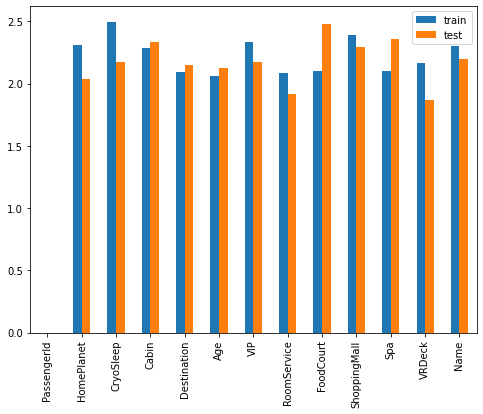

In [13]:
# Visualize
missing_df.T.plot.bar(figsize=(8, 6))

In [14]:
# Delete not needed objects
del missing_df

In [15]:
# Easier way to visualize by using open source package
# https://github.com/ResidentMario/missingno

# Import the modules
!pip install -q missingno==0.5.1
import missingno as msno

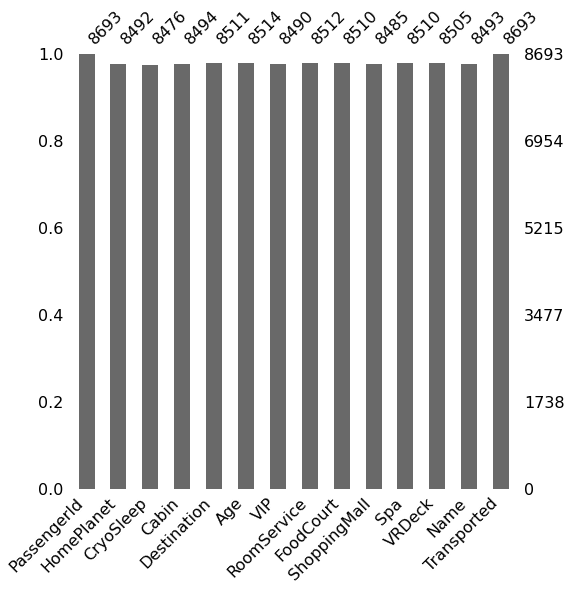

In [16]:
# Visualize
msno.bar(df=train, figsize=(8, 8))

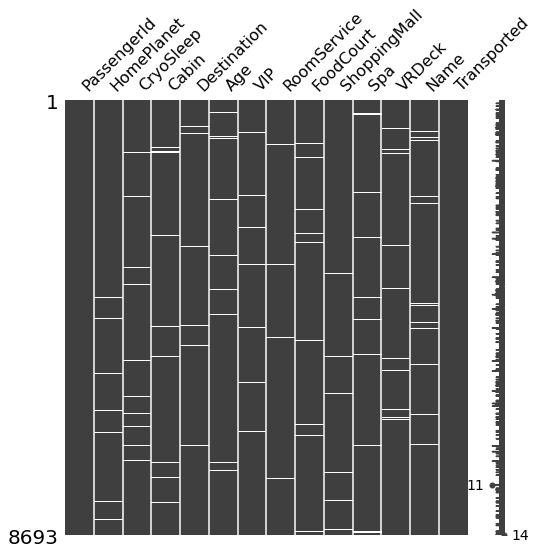

In [17]:
# or a matrix plot
msno.matrix(df=train, figsize=(8, 8))

In [18]:
# Import the modules
from sklearn.impute import SimpleImputer

# Declare an imputer with a most frequent strategy
imp = SimpleImputer(strategy="most_frequent")
# Fit and transform the train data
train.loc[:, train_missing] = imp.fit_transform(
    X=train.loc[:, train_missing]
)
# Transform the test data
test.loc[:, test_missing] = imp.transform(
    X=test.loc[:, test_missing]
)

# Trace the results
calc_missing(df=train)

,num_missing,percent_missing
PassengerId,0,0.0
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0


In [19]:
# Delete not needed objects
del train_missing

In [20]:
# Declare the feature types

# Features to drop
f2d = ["PassengerId", "Name"]

# Copy the train frame by dropping the unnecessary features
train_cp = train.drop(columns=f2d, axis=1)

In [21]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


In [22]:
train_cp.select_dtypes("object").columns

Index(['HomePlanet', 'Cabin', 'Destination'], dtype='object')

In [23]:
train_cp.select_dtypes("float64").columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [24]:
train_cp.select_dtypes("bool").columns

Index(['CryoSleep', 'VIP', 'Transported'], dtype='object')

In [25]:
# Categorical values
cat = train_cp.select_dtypes("object").columns
# Continous Values
cont = train_cp.select_dtypes("float64").columns
# Target Values
target = ["Transported"]
# Bool Values
bo = train_cp.select_dtypes("bool").columns.drop(labels=target[0])

In [26]:
# Describe the training data
train.describe()\
    .T\
    .drop(columns=["25%", "50%", "75%"])\
    .sort_values(by="std", ascending=False)

,count,mean,std,min,max
FoodCourt,8693.0,448.434027,1595.790627,0.0,29813.0
VRDeck,8693.0,298.261820,1134.126417,0.0,24133.0
Spa,8693.0,304.588865,1125.562559,0.0,22408.0
RoomService,8693.0,220.009318,660.519050,0.0,14327.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,23492.0
Age,8693.0,28.728517,14.355438,0.0,79.0


In [27]:
# Putting some color in it


def bground_gradient(df: pd.DataFrame):
    return df.describe()\
                .T\
                .drop(columns=["25%", "50%", "75%"])\
                .sort_values(by="std", ascending=False)\
                .style.background_gradient()\
                .bar(subset=["max"], color="red")\
                .bar(subset=["mean"], color="green")


bground_gradient(df=train)

,count,mean,std,min,max
FoodCourt,8693.000000,448.434027,1595.790627,0.000000,29813.000000
VRDeck,8693.000000,298.261820,1134.126417,0.000000,24133.000000
Spa,8693.000000,304.588865,1125.562559,0.000000,22408.000000
RoomService,8693.000000,220.009318,660.519050,0.000000,14327.000000
ShoppingMall,8693.000000,169.572300,598.007164,0.000000,23492.000000
Age,8693.000000,28.728517,14.355438,0.000000,79.000000


In [28]:
# Same for the test data
bground_gradient(df=test)

,count,mean,std,min,max
FoodCourt,4277.000000,428.592238,1510.155974,0.000000,25273.000000
VRDeck,4277.000000,304.898293,1235.991811,0.000000,22272.000000
Spa,4277.000000,295.895955,1104.872018,0.000000,19844.000000
RoomService,4277.000000,215.062427,601.914503,0.000000,11567.000000
ShoppingMall,4277.000000,173.233107,554.991776,0.000000,8292.000000
Age,4277.000000,28.559037,14.043484,0.000000,79.000000


In [29]:
# Redefine the dtypes of the continous features

# Import the modules
from typing import Union


def redefine_dtype(df: pd.DataFrame, features: Union[tuple, list]) -> pd.DataFrame:
    """Cast the given pandas frame to a specified dtype.

    Args:
        df (pd.DataFrame): The dataset.
        features (Union[tuple, list]): The features to be handled.

    Returns:
        pd.DataFrame: The pandas frame.
    """
    # Create a dtype dictionary
    dtypes = dict.fromkeys(features, np.uint16)
    # Return the redefined version of dtypes
    return df.astype(dtype=dtypes)


# Redefine the dtypes of the training data
train = redefine_dtype(df=train, features=cont)
# and the test data
test = redefine_dtype(df=test, features=cont)

# Trace
train.dtypes

PassengerId     object
HomePlanet      object
CryoSleep         bool
Cabin           object
Destination     object
Age             uint16
VIP               bool
RoomService     uint16
FoodCourt       uint16
ShoppingMall    uint16
Spa             uint16
VRDeck          uint16
Name            object
Transported       bool
dtype: object

In [30]:
# Check the memory usage of the training data after the casting operation
print(f"{round(train.memory_usage(deep=True).sum() * 1e-6, 3)} MB.")

2.995 MB.


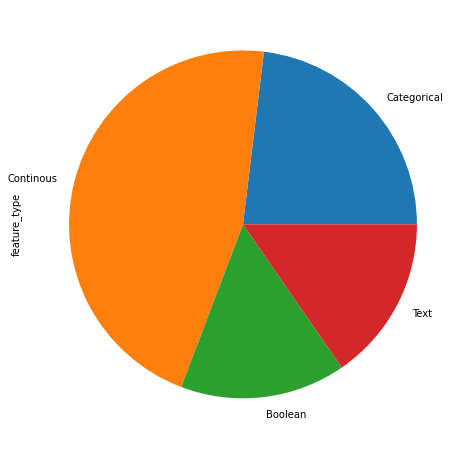

In [31]:
# Create the feature distribution in a pandas frame
ftype = pd.DataFrame(data=[len(cat), len(cont), len(bo), len(f2d)],
                     columns=["feature_type"],
                     index=["Categorical", "Continous", "Boolean", "Text"])
# Plot the feature distribution in a pie plot
ftype.plot.pie(y="feature_type", figsize=(8, 8), legend=False)

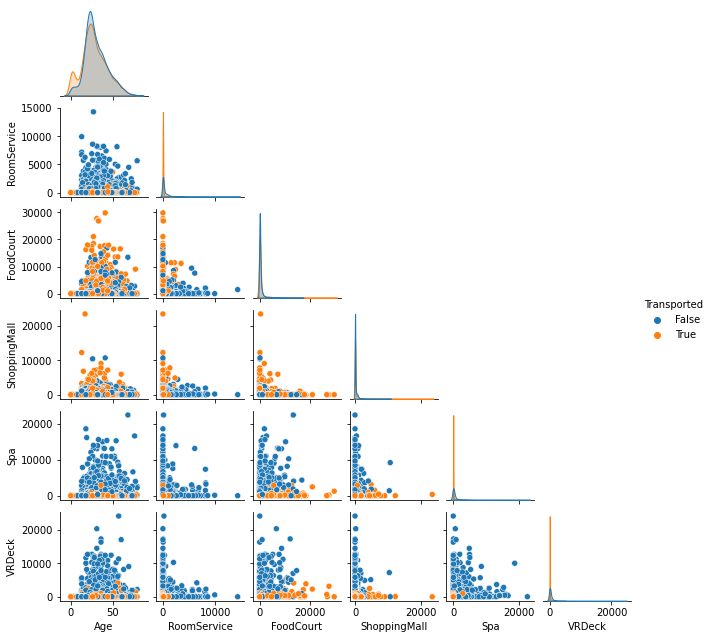

In [32]:
# Import the modules
import seaborn as sns

# General observation of the continuous features
# including the target data
sns.pairplot(data=train,
             hue=target[0],
             x_vars=cont,
             y_vars=cont,
             corner=True,
             height=1.5)

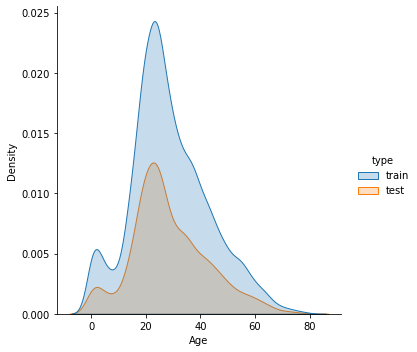

In [33]:
# Copy the "Age" feature from the training data
train_age = train.loc[:, "Age"].copy().to_frame()
# and the test data
test_age = test.loc[:, "Age"].copy().to_frame()
# Declare the types of the features
train_age["type"] = "train"
test_age["type"] = "test"
# Concat the values into one frame
ageDf = pd.concat([train_age, test_age]).reset_index(drop=True)
# Plot the "Age" distribution in training and testing data
# by the kde method
sns.displot(data=ageDf,
            x="Age",
            hue="type",
            kind="kde",
            fill=True)

In [34]:
# Delete not needed objects
del train_age, test_age, ageDf, ftype

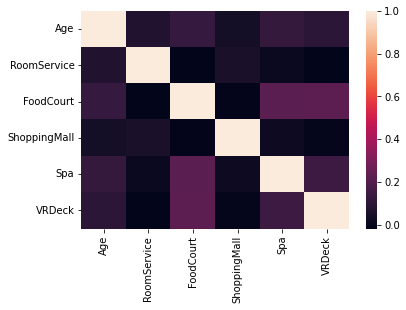

In [35]:
# Correlation Matrix

# Construct a correlation matrix
cor = train.loc[:, cont].corr()
# Visualize a correlation matrix
sns.heatmap(data=train.loc[:, cont].corr(),
            xticklabels=cor.columns,
            yticklabels=cor.columns)

In [36]:
# Delete not needed objects
del cor

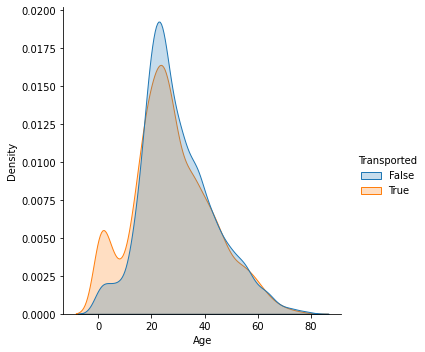

In [37]:
# Plot the "Age" distribution over the training data
# to observe whether there is a correlation between
# being transported or not
sns.displot(data=train,
            x="Age",
            hue=target[0],
            kind="kde",
            fill=True)

In [38]:
# Check the number of unique values in categorical features

# Iterate over the cat features
for c in cat:
    # Trace the number of unique values
    print(c, len(train_cp.loc[:, c].unique()))

HomePlanet 3
Cabin 6560
Destination 3


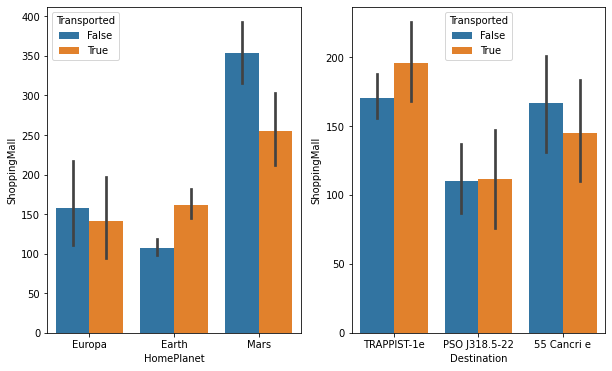

In [39]:
# Import the modules
import matplotlib.pyplot as plt

# Exclude the "Cabin" feature from the categorical list
new_cat = [c for c in cat if c != "Cabin"]

# Declare subplots
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Iterate over each categorical feature
for i, ax in enumerate(axes.flatten()):
    # Plot the features in bar style
    sns.barplot(data=train,
                x=new_cat[i],
                y="ShoppingMall",
                hue=target[0],
                ax=ax)

In [40]:
# Delete not needed objects
del new_cat, axes

In [41]:
train.Cabin.value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [42]:
# Unraveling the "Cabin" feature


def unravel_cabin(df:pd.DataFrame) -> pd.DataFrame:
    # Get the index of the "Cabin" feature
    idx = df.columns.to_list().index("Cabin")
    # Check whether new features exist
    if "CabinDeck" not in df.columns:
        # Insert replacements for the "Cabin" feature
        # as "CabinDeck"
        df.insert(loc=idx + 1, column="CabinDeck", value="")
        # as "CabinNum"
        df.insert(loc=idx + 2, column="CabinNum", value="")
        # as "CabinSide"
        df.insert(loc=idx + 3, column="CabinSide", value="")

    def helper_unravel(row: pd.Series) -> pd.Series:
        # Split the "Cabin" value
        row.CabinDeck, row.CabinNum, row.CabinSide = row.Cabin.split("/") # D, 48, S
        # Cast "CabinNum" as an integer
        row.CabinNum = int(row.CabinNum)
        # Categorize the "CabinNum" value
        if row.CabinNum < 501:
            # Assign as the first quartile of the ship
            row.CabinNum = "1st"
        elif row.CabinNum < 1001:
            # Assign as the second quartile of the ship
            row.CabinNum = "2nd"
        elif row.CabinNum < 1501:
            # Assign as the third quartile of the ship
            row.CabinNum = "3rd"
        else:
            # Assign as the fourth quartile of the ship
            row.CabinNum = "4th"
        # Return the row
        return row


    # Unravel the "Cabin" and return
    return df.apply(func=helper_unravel, axis=1)


# Unravel the "Cabin" feature for the train data
train = unravel_cabin(df=train)
# Trace
train.loc[:, ["Cabin", "CabinDeck", "CabinNum", "CabinSide"]].sample(n=5, random_state=42)

,Cabin,CabinDeck,CabinNum,CabinSide
304,F/63/S,F,1st,S
2697,G/460/S,G,1st,S
8424,G/1449/S,G,3rd,S
1672,G/291/P,G,1st,P
8458,D/288/P,D,1st,P


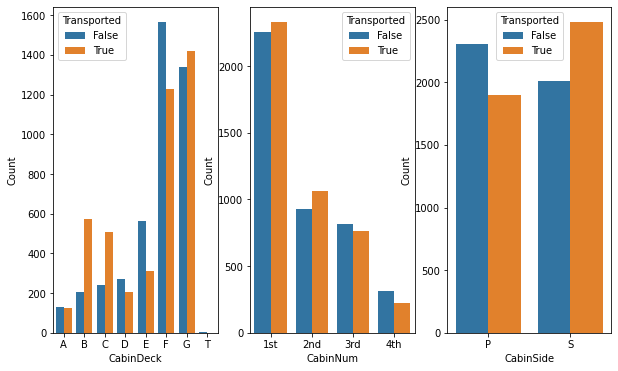

In [43]:
# Declare new "Cabin" features in an array
cabins = ["CabinDeck", "CabinNum", "CabinSide"]
# Create a temporary frame that contains only
# the new features and the target values
tempDf = train.loc[:, [*cabins, target[0]]]

# Declare four subplots
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

# Iterate over the "Cabin" features
for i, ax in enumerate(axes.flatten()):
    # Pick "Cabin" feature
    cabin = cabins[i]
    # Organize the temporary frame
    t = tempDf.loc[:, [cabin, target[0]]].value_counts()\
            .to_frame()\
            .reset_index()\
            .rename(columns={0: "Count"})\
            .sort_values([cabin, "Count"],
                         ascending=[True, False])
    # Plot the frame in bar style
    sns.barplot(data=t,
                x=cabin,
                y="Count",
                hue=target[0],
                ax=ax)